In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from tqdm import tqdm
import random
import datetime

In [40]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
PATH ='../data/'

In [3]:
tre_raw = pd.read_csv(PATH + 'train_err_data.csv')
tp = pd.read_csv(PATH + 'train_problem_data.csv')



# Count_e : problem 일어난 개수
tpd= tp.user_id.value_counts().to_frame().reset_index()
tpd.columns = ['user_id','count_e']


In [4]:
tre = pd.merge(tre_raw,tpd,on='user_id',how='outer')
tre.count_e =tre.count_e.fillna(0).astype('int')

In [5]:
tse = pd.read_csv("../data/test_err_data.csv")

In [7]:
tp=pd.read_csv(PATH+"train_problem_data.csv")
tp.time =pd.to_datetime(tp.time.astype('str'))
p_user = tp.user_id.unique()
np_user = list(set(tre.user_id.unique())  - set(p_user))

In [8]:
tq =pd.read_csv(PATH+"train_quality_data.csv")

tqq =tq[['time','user_id']].drop_duplicates().reset_index(drop=True)
tqq.time = pd.to_datetime(tqq.time.astype('str'))

C:\Users\User01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
def check_unique(col,df1,df2):
    def change_len(x):
        if len(x) ==10:
            return x[:5]
        else:
            return x
    print("about",col)
    if col !='fwvers':
        train_c = set(df1[col].unique())
        test_c  = set(df2[col].unique())
        print("train only in %s "%col,train_c-test_c)
        print("test only in %s "%col,test_c -train_c)
        total = (train_c | test_c)
    else:
        train_c = set(df1[col].apply(change_len).unique())
        test_c  = set(df2[col].apply(change_len).unique())
        print("train only in %s "%col,train_c-test_c)
        print("test only in %s "%col,test_c -train_c)
        total = (train_c | test_c)        
        
    print()
        
    return total

model_total=check_unique('model_nm',tre,tse)
errtype_total=check_unique('errtype',tre,tse)
fwver_total = check_unique('fwver',tre,tse)

about model_nm
train only in model_nm  set()
test only in model_nm  set()

about errtype
train only in errtype  set()
test only in errtype  set()

about fwver
train only in fwver  {'05.15.2122', '04.16.2641', '04.33.1095', '05.15.2090', '04.16.3345', '04.22.1442'}
test only in fwver  {'10.22.1780', '04.73.2569', '04.22.1448', '04.22.1478', '04.22.1608', '04.73.2577', '04.22.1170', '10.22.1770', '04.22.1772'}



In [55]:
pd.options.display.max_columns=50
pd.options.display.max_rows=200

In [66]:
def get_distribution_errtype():
    total=[]
    for num in range(1,43):
        t1=tre.loc[tre.errtype==num]
        
        t11=t1.user_id.value_counts().describe().to_frame().T.rename(index={'user_id':num})
        pnumber=len(t1.loc[t1.user_id.isin(p_user)].user_id.unique())
        npnumber=len(t1.loc[t1.user_id.isin(np_user)].user_id.unique())
        
        
        t11['p_counts'] =pnumber
        t11['npnumber'] =npnumber
        if pnumber+npnumber ==0:
            t11['p_ratio']  = round((pnumber/1)*100,2)
        else:
            t11['p_ratio']  = round((pnumber/(pnumber+npnumber))*100,2)
            
        total.append(t11)
        
    
    return pd.concat(total).reset_index().rename(columns={'index':'errtype'})

errtpye_distribution = get_distribution_errtype()

errtpye_distribution.sort_values('p_ratio', ascending = False)

,errtype,count,mean,std,min,25%,50%,75%,max,p_counts,npnumber,p_ratio
19,20,1546.0,1.345408,1.139906,1.0,1.0,1.0,1.0,23.0,1333,213,86.22
17,18,1768.0,1.510747,1.815140,1.0,1.0,1.0,1.0,41.0,1521,247,86.03
24,25,420.0,2.819048,5.631960,1.0,1.0,1.0,3.0,78.0,360,60,85.71
20,21,381.0,1.593176,1.742610,1.0,1.0,1.0,2.0,22.0,316,65,82.94
18,19,419.0,1.584726,1.720786,1.0,1.0,1.0,2.0,23.0,346,73,82.58
29,30,375.0,1.072000,0.288162,1.0,1.0,1.0,1.0,4.0,260,115,69.33
8,9,63.0,1.730159,2.444258,1.0,1.0,1.0,1.0,17.0,38,25,60.32
34,35,2039.0,4.996077,24.371108,1.0,1.0,1.0,3.0,828.0,1186,853,58.17
38,39,766.0,20.652742,54.690760,1.0,2.0,6.0,18.0,965.0,405,361,52.87
33,34,3733.0,44.343959,346.840904,1.0,2.0,6.0,19.0,12356.0,1963,1770,52.59


In [ ]:
def key_typecode(t,c = None):
    if c == None:
        return "errcode_" + str(t).strip()
    
    return str(t).strip() + '_' + str(c).strip()

columns = []
column_index = {}
count = 0
for i in tqdm(range(0,42)):
    for j in same_error_code:
        key = key_typecode(i, j)
        if key not in columns:
            columns.append(key)
            column_index[key] = count
            count += 1
        key = key_typecode(i)
        if key not in columns:
            columns.append(key)
            column_index[key] = count
            count += 1

In [14]:

def get_same_errcode():
    train_value_count = tre['errcode'].value_counts()
    test_value_count = tse['errcode'].value_counts()
    same_error_code = set(train_value_count.keys()).intersection(set(test_value_count.keys()))
    total_value_count = {}

    for i in same_error_code.copy():
        value = 0
        if i in train_value_count.keys():
            value += train_value_count[i]
        if i in test_value_count.keys():
            value += test_value_count[i]
        if (value < 100):
            same_error_code.remove(i)
    return same_error_code

In [15]:
same_error_code = get_same_errcode()

# error_type, error_code 매핑
def key_typecode(t,c = None):
    if c == None:
        return "errcode_" + str(t).strip()
    
    return str(t).strip() + '_' + str(c).strip()

columns = []
column_index = {}
count = 0


for i in tqdm(range(0,42)):
    for j in same_error_code:
        key = key_typecode(i, j)
        if key not in columns:
            columns.append(key)
            column_index[key] = count
            count += 1
        key = key_typecode(i)
        if key not in columns:
            columns.append(key)
            column_index[key] = count
            count += 1
            
print("검색된 칼럼 수", len(columns))

100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 417.80it/s]

검색된 칼럼 수 3318


In [48]:
tre["type_code"] = tre["errtype"].astype("str") + "_" + tre["errcode"].astype("str")

In [43]:
def get_same_errtype_code():
    train_value_count = tre['type_code'].value_counts()
    same_error_code = set(train_value_count.keys())
    total_value_count = {}

    for i in same_error_code.copy():
        value = 0
        if i in train_value_count.keys():
            value += train_value_count[i]
        if (value < 100):
            same_error_code.remove(i)
    return same_error_code

In [47]:
def get_distribution_type_errcode():
    total=[]
    columns = get_same_errtype_code()
    for num in tqdm(columns):
        t1=tre.loc[tre.type_code == num]
        if len(t1) > 0:
        
            t11=t1.user_id.value_counts().describe().to_frame().T.rename(index={'user_id':num})
            pnumber=len(t1.loc[t1.user_id.isin(p_user)].user_id.unique())
            npnumber=len(t1.loc[t1.user_id.isin(np_user)].user_id.unique())

            t11['p_counts'] =pnumber
            t11['npnumber'] =npnumber
            if pnumber+npnumber ==0:
                t11['p_ratio']  = round((pnumber/1)*100,2)
            else:
                t11['p_ratio']  = round((pnumber/(pnumber+npnumber))*100,2)


            total.append(t11)
            

    return pd.concat(total).reset_index().rename(columns={'index':'errcode'})

errtype_code_distribution = get_distribution_type_errcode()
errtype_code_distribution.sort_values('p_ratio', ascending = False)

100%|████████████████████████████████████████████████████████████████████████████████| 117/117 [01:24<00:00,  1.39it/s]


,errcode,count,mean,std,min,25%,50%,75%,max,p_counts,npnumber,p_ratio
68,25_2,87.0,1.793103,2.052440,1.0,1.00,1.0,2.00,17.0,77,10,88.51
19,25_1,132.0,2.742424,4.336286,1.0,1.00,1.0,2.00,32.0,114,18,86.36
43,20_1,1546.0,1.345408,1.139906,1.0,1.00,1.0,1.00,23.0,1333,213,86.22
14,18_1,1768.0,1.510747,1.815140,1.0,1.00,1.0,1.00,41.0,1521,247,86.03
57,25_UNKNOWN,84.0,1.523810,1.418265,1.0,1.00,1.0,1.00,9.0,71,13,84.52
86,21_1,381.0,1.593176,1.742610,1.0,1.00,1.0,2.00,22.0,316,65,82.94
114,19_1,419.0,1.584726,1.720786,1.0,1.00,1.0,2.00,23.0,346,73,82.58
66,25_scanning timeout,116.0,3.379310,7.523477,1.0,1.00,2.0,3.00,67.0,94,22,81.03
81,23_terminate by peer user,1225.0,2.052245,10.380532,1.0,1.00,1.0,2.00,354.0,911,314,74.37
47,30_4,322.0,1.055901,0.267641,1.0,1.00,1.0,1.00,4.0,210,112,65.22


In [75]:
def get_distribution_errcode():
    total=[]
    errcodes = get_same_errcode()
    for num in tqdm(errcodes):
        t1=tre.loc[tre.errcode==num]
        
        t11=t1.user_id.value_counts().describe().to_frame().T.rename(index={'user_id':num})
        pnumber=len(t1.loc[t1.user_id.isin(p_user)].user_id.unique())
        npnumber=len(t1.loc[t1.user_id.isin(np_user)].user_id.unique())
        
        
        t11['p_counts'] =pnumber
        t11['npnumber'] =npnumber
        if pnumber+npnumber ==0:
            t11['p_ratio']  = round((pnumber/1)*100,2)
        else:
            t11['p_ratio']  = round((pnumber/(pnumber+npnumber))*100,2)
            
        total.append(t11)
        
    
    return pd.concat(total).reset_index().rename(columns={'index':'errcode'})

errcode_distribution = get_distribution_errcode()
errcode_distribution.sort_values('p_ratio', ascending = False)

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:52<00:00,  1.51it/s]


,errcode,count,mean,std,min,25%,50%,75%,max,p_counts,npnumber,p_ratio
29,scanning timeout,116.0,3.379310,7.523477,1.0,1.00,2.0,3.00,67.0,94,22,81.03
28,terminate by peer user,1225.0,2.059592,10.382027,1.0,1.00,1.0,2.00,354.0,911,314,74.37
58,C-13053,34.0,2.000000,3.446562,1.0,1.00,1.0,1.00,20.0,22,12,64.71
1,98,43.0,4.790698,8.683751,1.0,1.00,2.0,4.00,52.0,27,16,62.79
74,110,16.0,22.750000,30.584310,1.0,3.75,19.5,22.25,129.0,10,6,62.50
3,connection fail for LMP response timout,114.0,1.640351,1.470219,1.0,1.00,1.0,2.00,10.0,71,43,62.28
27,109,10.0,9.800000,7.036413,1.0,3.75,8.5,15.00,20.0,6,4,60.00
64,21,268.0,3.664179,12.985699,1.0,1.00,1.0,2.00,151.0,160,108,59.70
72,97,32.0,5.468750,10.009622,1.0,1.00,2.0,5.25,56.0,19,13,59.38
66,96,58.0,5.017241,7.124190,1.0,1.00,3.0,6.00,47.0,34,24,58.62


In [81]:
def make(num):
    err1=tre.loc[tre.errtype==num]
    users=err1.user_id.value_counts().to_frame().index
    t2 =err1.loc[err1.user_id.isin(users)]
    t2['err_'+str(num)] = t2.time.dt.hour

    p = t2.loc[t2.user_id.isin(p_user)]
    np = t2.loc[t2.user_id.isin(np_user)]

    pdf =p['err_'+str(num)].value_counts().sort_index().to_frame().T.rename(index={'err_'+str(num):'err_p_'+str(num)})
    npdf =np['err_'+str(num)].value_counts().sort_index().to_frame().T.rename(index={'err_'+str(num):'err_np_'+str(num)})

    f = pd.concat([pdf,npdf])
    f2= f.copy()
    f=f.fillna(0)
#     X_MinMax_scaled = minmax_scale(f, axis=1, copy=True)
#     f.iloc[:,:]=X_MinMax_scaled*100
    f=round(f)
    return f,f2

In [121]:
def preprocessing_fw_update(target_df,mode='train'):
    if mode =='train':
        first_num = 10000
        count_num =15000
        
    else:
        first_num = 30000
        count_num =14999   
        
        
    dp = target_df[['user_id','model_nm','fwver']]

    unique_data =target_df[(dp !=dp.shift(1)).sum(axis=1)>0]

    fwver_total_dic ={}
    for v in range(len(fwver_total)):
        fwver_total_dic[sorted(list(fwver_total))[v]] = v+1

    def fwver_tran(x):
        return fwver_total_dic[x]

    fwver = np.zeros((count_num,21))
    for idx in tqdm(unique_data.user_id.unique()):
        df = unique_data.loc[unique_data.user_id==idx].fwver.values
        for l in range(len(df)):
            fwver[idx-first_num,l] =fwver_total_dic[df[l]]

    fw_df = pd.DataFrame(fwver).reset_index().rename(columns={'index':'user_id'})

    fwver_total_dic_rev = {v: k for k, v in fwver_total_dic.items()}
    fwver_total_dic_rev2 = fwver_total_dic_rev.copy()
    fwver_total_dic_rev[0] =0
    fwver_total_dic_rev2[0] = '04.22.1750'  #max 값
    

    def fwver_tras_reverse(x):
        return fwver_total_dic_rev[x]
    
    def fwver_tras_reverse2(x):
        return fwver_total_dic_rev2[x]
    
    fw_df[0] =fw_df[0].apply(fwver_tras_reverse2)
    fw_df[1] =fw_df[1].apply(fwver_tras_reverse)
    fw_df[2] =fw_df[2].apply(fwver_tras_reverse)
    fw_df[3] =fw_df[3].apply(fwver_tras_reverse)
    fw_df[4] =fw_df[4].apply(fwver_tras_reverse)

    fw_df['user_id'] +=first_num

    def model(x):
        if x in p_user:
            return 1
        else:
            return 0




    if mode =='train':
        fw_df['pb'] =fw_df.user_id.apply(model)

        fw_df2=fw_df.loc[fw_df.pb ==1]
        pfw = fw_df2[[0,1,2,3,4]].value_counts().to_frame().rename(columns={0:'problem'}).reset_index().sort_values(0)\
        .rename(columns={0:'fw1',1:'fw2',2:'fw3',3:'fw4',4:'fw5'}).reset_index(drop=True)

        fw_df2=fw_df.loc[fw_df.pb ==0]
        npfw = fw_df2[[0,1,2,3,4]].value_counts().to_frame().rename(columns={0:'non-problem'}).reset_index().sort_values(0)\
        .rename(columns={0:'fw1',1:'fw2',2:'fw3',3:'fw4',4:'fw5'}).reset_index(drop=True)

        fw_t= fw_df[[0,1,2,3,4]].value_counts().to_frame().rename(columns={0:'counts'}).reset_index().sort_values(0)\
        .rename(columns={0:'fw1',1:'fw2',2:'fw3',3:'fw4',4:'fw5'}).reset_index(drop=True)
        s1=pd.merge(fw_t,pfw,how='outer').fillna(0)
        s2=pd.merge(s1,npfw,how='outer').fillna(0)
        s2['problem'] =s2['problem'].astype('int')
        s2['non-problem'] =s2['non-problem'].astype('int')
        s2['problem-ratio'] = round(s2['problem']/s2['counts'] *100,2)
        return s2

    else:
        fw_t= fw_df[[0,1,2,3,4]].value_counts().to_frame().rename(columns={0:'counts'}).reset_index().sort_values(0)\
        .rename(columns={0:'fw1',1:'fw2',2:'fw3',3:'fw4',4:'fw5'}).reset_index(drop=True)
        return fw_t

In [122]:
fw_tr = preprocessing_fw_update(tre,'train')
fw_tr=fw_tr.rename(columns={'counts':'train_c'})


100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:07<00:00, 2089.61it/s]


In [123]:
fw_ts = preprocessing_fw_update(tse,'test')
fw_ts=fw_ts.rename(columns={'counts':'test_c'})


100%|██████████████████████████████████████████████████████████████████████████| 14998/14998 [00:06<00:00, 2478.98it/s]


In [124]:
fw_totals = pd.merge(fw_tr,fw_ts,how='outer')[['fw1','fw2','fw3','fw4','fw5','problem','non-problem','problem-ratio','train_c','test_c']].fillna(0)

In [125]:
fw_totals.loc[fw_totals.train_c >100].sort_values('train_c',ascending=False)

,fw1,fw2,fw3,fw4,fw5,problem,non-problem,problem-ratio,train_c,test_c
42,04.22.1750,04.22.1778,0,0,0,1542.0,2564.0,37.55,4106.0,4184.0
57,04.33.1185,04.33.1261,0,0,0,940.0,2239.0,29.57,3179.0,3126.0
80,05.15.2138,0,0,0,0,662.0,2345.0,22.02,3007.0,3014.0
14,04.16.3553,0,0,0,0,569.0,1284.0,30.71,1853.0,1873.0
6,03.11.1167,0,0,0,0,133.0,540.0,19.76,673.0,680.0
63,04.33.1261,0,0,0,0,141.0,371.0,27.54,512.0,486.0
26,04.16.3553,04.16.3571,04.16.3553,0,0,173.0,204.0,45.89,377.0,420.0
27,04.16.3553,04.33.1261,0,0,0,250.0,17.0,93.63,267.0,242.0
44,04.22.1750,0,0,0,0,39.0,118.0,24.84,157.0,126.0
24,04.16.3553,04.33.1185,04.33.1261,0,0,135.0,10.0,93.10,145.0,153.0


In [126]:
is_train = fw_totals.train_c > 100

fw_totals[is_train]

,fw1,fw2,fw3,fw4,fw5,problem,non-problem,problem-ratio,train_c,test_c
6,03.11.1167,0,0,0,0,133.0,540.0,19.76,673.0,680.0
14,04.16.3553,0,0,0,0,569.0,1284.0,30.71,1853.0,1873.0
24,04.16.3553,04.33.1185,04.33.1261,0,0,135.0,10.0,93.10,145.0,153.0
26,04.16.3553,04.16.3571,04.16.3553,0,0,173.0,204.0,45.89,377.0,420.0
27,04.16.3553,04.33.1261,0,0,0,250.0,17.0,93.63,267.0,242.0
42,04.22.1750,04.22.1778,0,0,0,1542.0,2564.0,37.55,4106.0,4184.0
44,04.22.1750,0,0,0,0,39.0,118.0,24.84,157.0,126.0
57,04.33.1185,04.33.1261,0,0,0,940.0,2239.0,29.57,3179.0,3126.0
63,04.33.1261,0,0,0,0,141.0,371.0,27.54,512.0,486.0
80,05.15.2138,0,0,0,0,662.0,2345.0,22.02,3007.0,3014.0


In [127]:
mode = 'train'
target_df = tre
if mode =='train':
    first_num = 10000
    count_num =15000

else:
    first_num = 30000
    count_num =14999   


dp = target_df[['user_id','model_nm','fwver']]
unique_data =target_df[(dp !=dp.shift(1)).sum(axis=1)>0]

dp2 = target_df[['user_id','model_nm']]
unique_data2 =target_df[(dp2 !=dp2.shift(1)).sum(axis=1)>0]

fwver_total_dic ={}
for v in range(len(fwver_total)):
    fwver_total_dic[sorted(list(fwver_total))[v]] = v+1
    


def fwver_tran(x):
    return fwver_total_dic[x]

fwver = np.zeros((count_num,24))
for idx in tqdm(unique_data.user_id.unique()):
    df_md =unique_data2.loc[unique_data2.user_id==idx].model_nm.values
    df_fw = unique_data.loc[unique_data.user_id==idx].fwver.values
    
    for md in range(len(df_md)):
        fwver[idx-first_num,md] = int(df_md[md][-1])+1
    
    for l in range(3,len(df_fw)+3):
        fwver[idx-first_num,l] =fwver_total_dic[df_fw[l-3]]

fw_df = pd.DataFrame(fwver).reset_index().rename(columns={'index':'user_id'})

fwver_total_dic_rev = {v: k for k, v in fwver_total_dic.items()}
fwver_total_dic_rev2 = fwver_total_dic_rev.copy()
fwver_total_dic_rev[0] =0
fwver_total_dic_rev2[0] = '04.22.1750'  #max 값


def fwver_tras_reverse(x):
    return fwver_total_dic_rev[x]

def fwver_tras_reverse2(x):
    return fwver_total_dic_rev2[x]

fw_df[3] =fw_df[3].apply(fwver_tras_reverse2)
fw_df[4] =fw_df[4].apply(fwver_tras_reverse)
fw_df[5] =fw_df[5].apply(fwver_tras_reverse)
fw_df[6] =fw_df[6].apply(fwver_tras_reverse)
fw_df[7] =fw_df[7].apply(fwver_tras_reverse)


fw_df = fw_df.rename(columns={0:'md1',1:'md2',2:'md3',3:'fw1',4:'fw2',5:'fw3',6:'fw4',7:'fw5'})
fw_df['user_id'] =fw_df['user_id']+10000

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:14<00:00, 1028.08it/s]


In [128]:
fw_df

,user_id,md1,md2,md3,fw1,fw2,fw3,fw4,fw5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,10000,4.0,0.0,0.0,05.15.2138,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001,3.0,0.0,0.0,04.33.1185,04.33.1261,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,4.0,0.0,0.0,05.15.2138,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10003,3.0,0.0,0.0,04.33.1185,04.33.1261,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10004,1.0,0.0,0.0,04.22.1750,04.22.1778,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24995,3.0,0.0,0.0,04.33.1261,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,24996,4.0,0.0,0.0,05.15.2138,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,24997,1.0,0.0,0.0,04.22.1750,04.22.1778,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14998,24998,1.0,0.0,0.0,04.22.1750,04.22.1778,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
def dr(num):
    user_id_idx = uid1.values[num]
    err_idx = df.loc[df.user_id ==user_id_idx]
    p_idx =df_p.loc[df_p.user_id ==user_id_idx]
    flow_idx = fw_df.loc[fw_df.user_id ==user_id_idx].iloc[:,:9]

    
    
    print("fwver_flow")
    display(flow_idx)
    print("problem time")
    display(p_idx)
    print('user err distribution')
    display(err_idx.errcode.value_counts().to_frame().T)
    display(err_idx.errtype.value_counts().to_frame().T)

        
        
    fig ,axes = plt.subplots(2,1,figsize=(20,10))
    sns.scatterplot(data=err_idx,x='time' ,y='errtype',hue='fwver',s=7,ax=axes[0])
    
    
    if len(p_idx) !=0:
        for v in range(len(p_idx)):
            axes[0].axvline(p_idx.time.values[v],c='r',linestyle='--',label='prblem occur')
        
    start_date = pd.to_datetime("2020-11-01 11:00:00")
    for v in range(30):
        axes[0].axvline(start_date,c='y',linestyle='--',label='11:00')
        start_date +=datetime.timedelta(days=1)
        
        
    tqdf = tqq.loc[tqq.user_id ==user_id_idx]
    for tqs in range(len(tqdf)):
        axes[0].axvline(tqdf.time.values[tqs],c='b',linestyle='--',label='quality',alpha=0.5)
   
    
    axes[0].set_xlim(pd.to_datetime('2020-11-01'),pd.to_datetime('2020-11-30 23:00:00'))
    axes[0].set_title('errtype -fw, user_id :'+str(user_id_idx))
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axes[0].legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc='upper left')
#     for idxs in err_idx.errcode.value_counts().to_frame().index:
#         code_df=err_idx.loc[err_idx.errcode ==idxs]

    
    
    sns.scatterplot(data=err_idx,x='time' ,y='errcode',hue='errtype',ax=axes[1], palette='tab20c')
    axes[1].set_xlim(pd.to_datetime('2020-11-01'),pd.to_datetime('2020-11-30 23:00:00'))
    axes[1].set_title('errcode -fw')
    axes[1].legend(title='errtype',bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    

fwver_flow


,user_id,md1,md2,md3,fw1,fw2,fw3,fw4,fw5
4,10004,1.0,0.0,0.0,04.22.1750,04.22.1778,0,0,0


problem time


,user_id,time
492,10004,2020-11-04 12:00:00


user err distribution


,1,connection timeout,0,2,14,active,standby,3,13,terminate by peer user,connection fail to establish,8.0
errcode,529,104,98,14,9,7,5,4,3,2,1,1


,31,15,22,23,16,26,12,11,33,14,40,7,13,6,42,37,36,4
errtype,176,143,140,119,91,33,19,16,16,5,4,4,3,3,2,1,1,1


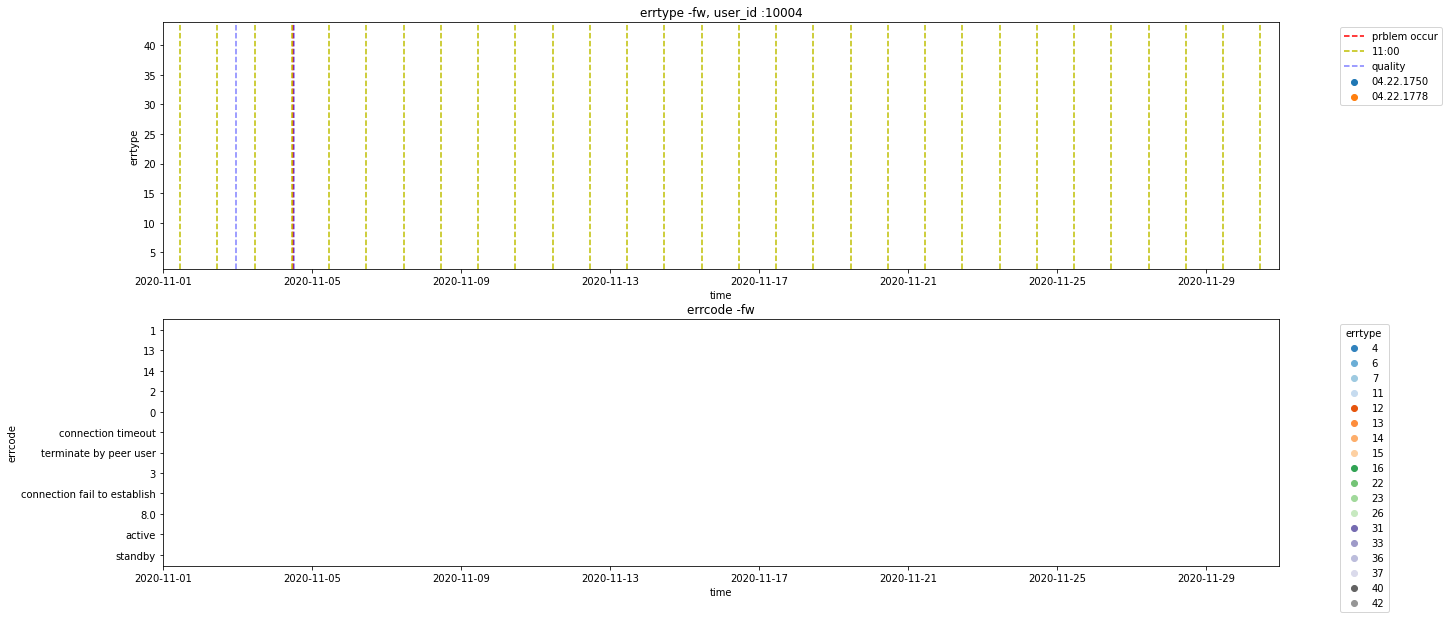

fwver_flow


,user_id,md1,md2,md3,fw1,fw2,fw3,fw4,fw5
5,10005,1.0,0.0,0.0,04.22.1750,04.22.1778,0,0,0


problem time


,user_id,time
3857,10005,2020-11-13 12:00:00


user err distribution


,1,B-A8002,0,NFANDROID2,connection timeout,2,3,terminate by peer user,standby,14,8.0,active
errcode,384,176,88,61,13,12,4,4,3,2,1,1


,5,31,15,16,41,26,40,22,23,11,12,33,35,39,42,24,28,27,34,36,37,14,10,7,4
errtype,176,114,109,68,61,47,44,41,21,17,17,16,3,2,2,2,1,1,1,1,1,1,1,1,1


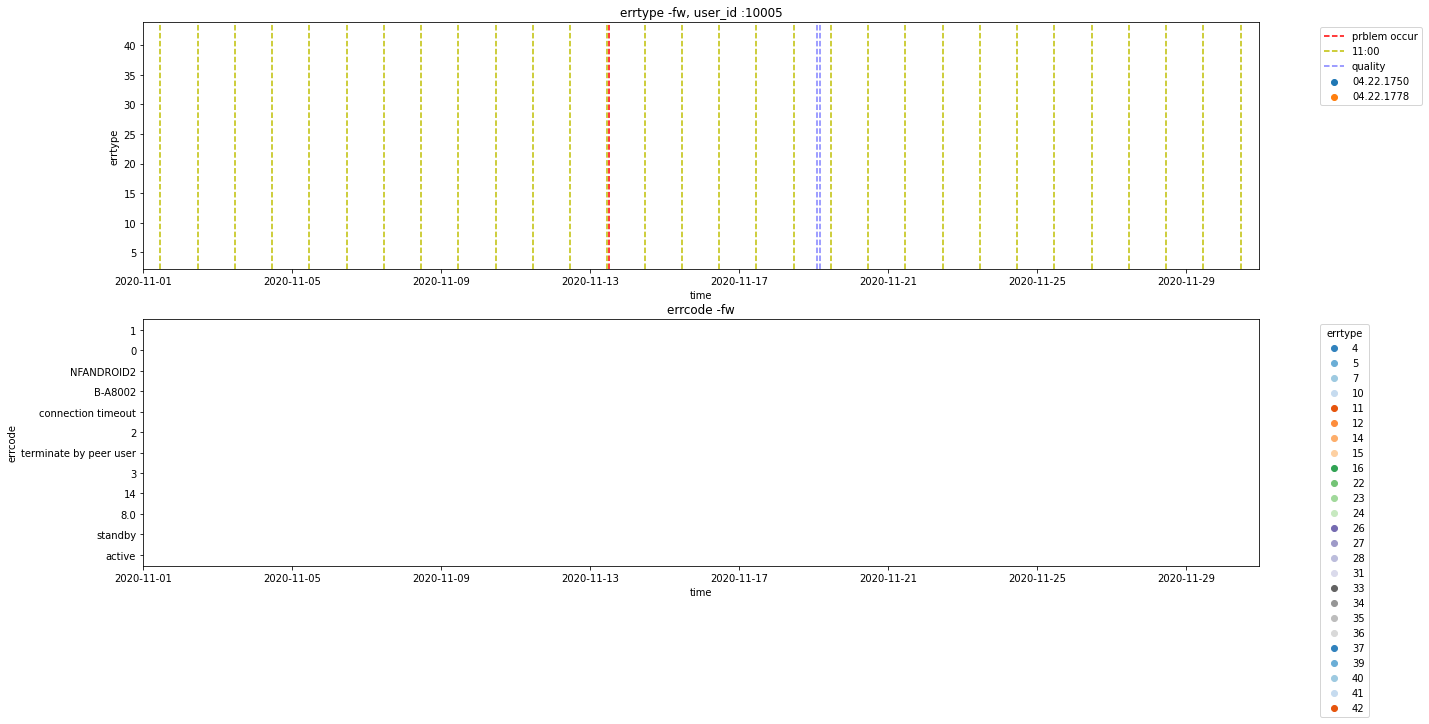

In [189]:
for v in range(2):
    dr(v)